In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.palettes import Category10_10
# Read the CSV file with counts
df = pd.read_csv('unique_words_AR.csv')


# Arabic

## Tone

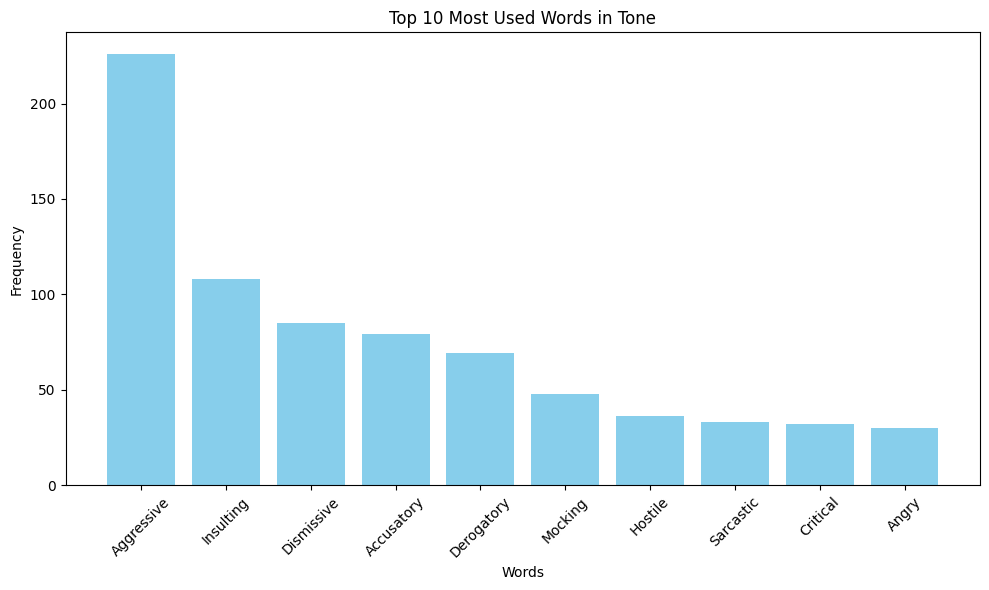

         Tone  Tone appears
0  Aggressive         226.0
1   Insulting         108.0
2  Dismissive          85.0
3  Accusatory          79.0
4  Derogatory          69.0
5     Mocking          48.0
6     Hostile          36.0
7   Sarcastic          33.0
8    Critical          32.0
9       Angry          30.0


In [8]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

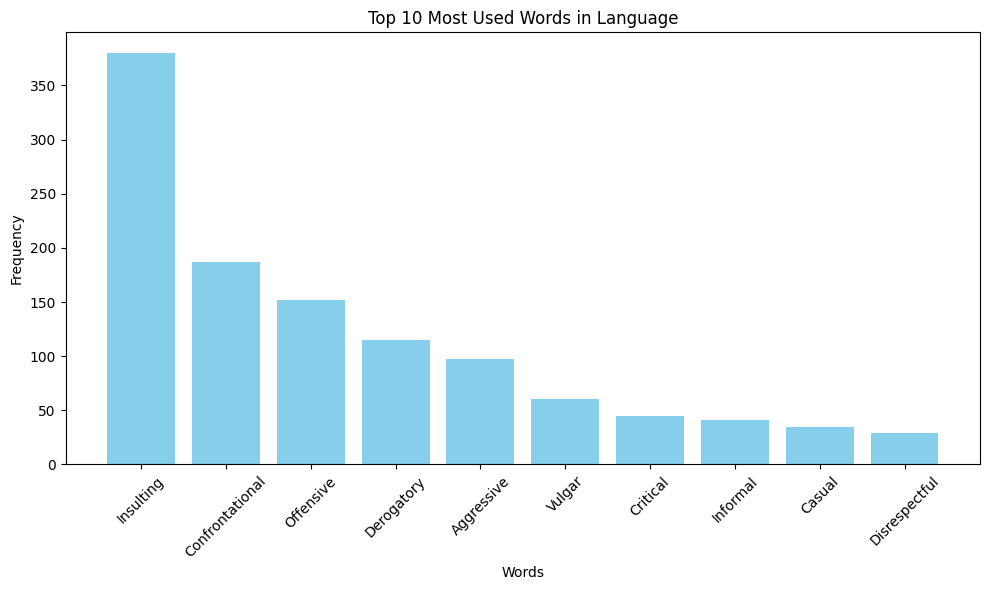

          Language  Language appears
0        Insulting             380.0
1  Confrontational             187.0
2        Offensive             152.0
3       Derogatory             115.0
4       Aggressive              97.0
5           Vulgar              60.0
6         Critical              45.0
7         Informal              41.0
8           Casual              35.0
9    Disrespectful              29.0


In [9]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

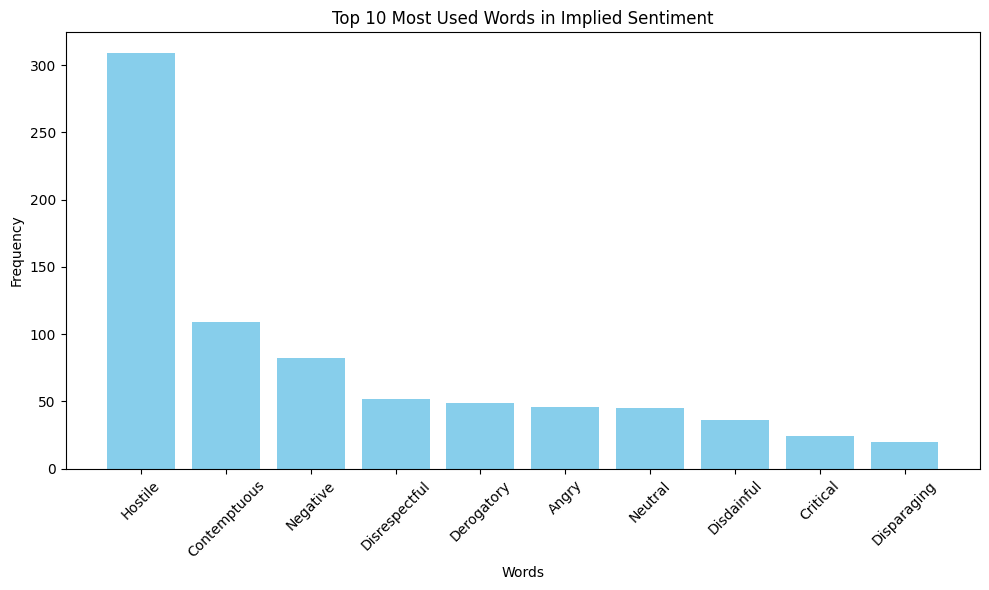

  Implied Sentiment  Implied Sentiment appears
0           Hostile                      309.0
1      Contemptuous                      109.0
2          Negative                       82.0
3     Disrespectful                       52.0
4        Derogatory                       49.0
5             Angry                       46.0
6           Neutral                       45.0
7        Disdainful                       36.0
8          Critical                       24.0
9       Disparaging                       20.0


In [10]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

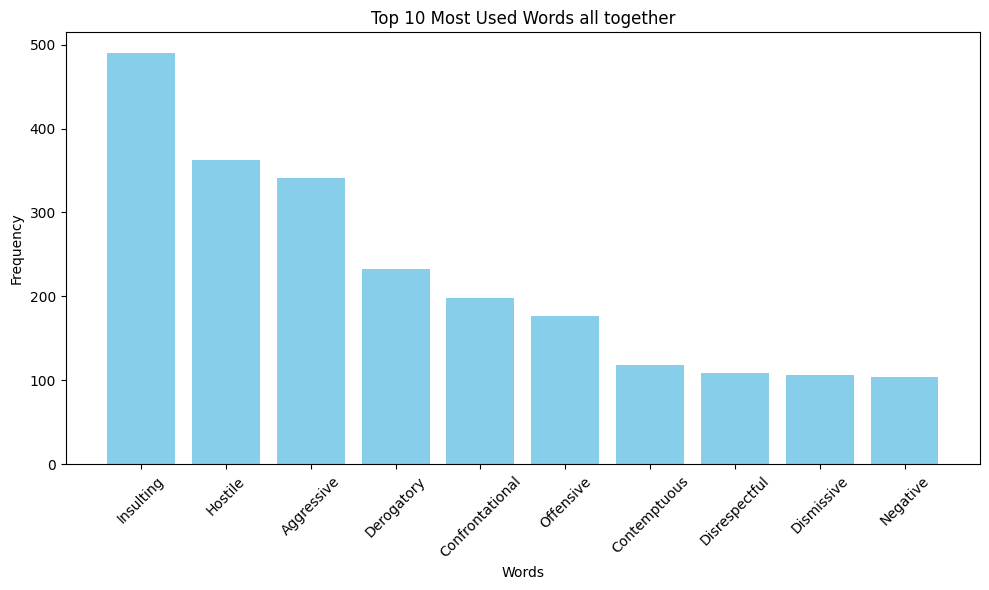

           combine  combine appears
0        Insulting            490.0
1          Hostile            363.0
2       Aggressive            341.0
3       Derogatory            233.0
4  Confrontational            198.0
5        Offensive            177.0
6     Contemptuous            118.0
7    Disrespectful            109.0
8       Dismissive            107.0
9         Negative            104.0


In [11]:
# Plot histogram for the 'Combine' column
implied_sentiment_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['combine'], implied_sentiment_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

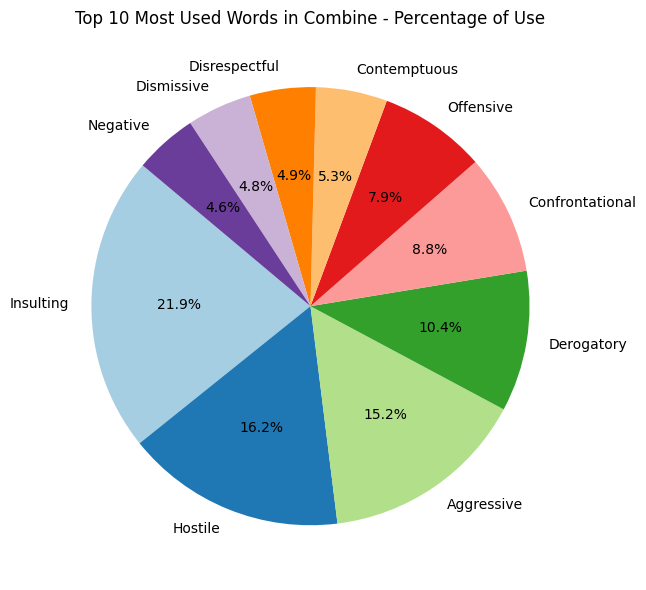

In [13]:
total_sentences = 1000

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

## Toxic Words

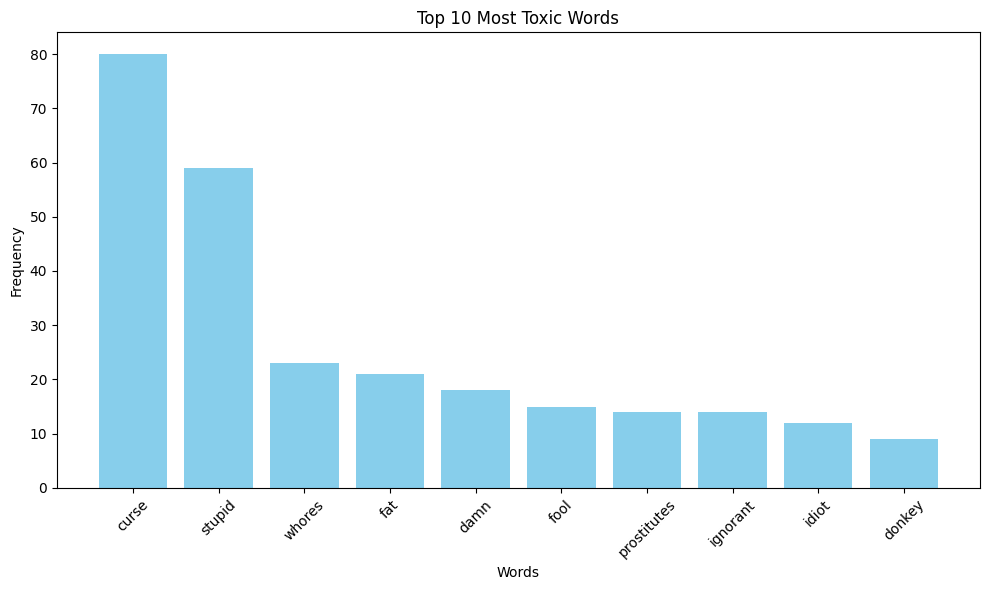

  uniq sequences  number appears
0          curse              80
1         stupid              59
2         whores              23
3            fat              21
4           damn              18
5           fool              15
6    prostitutes              14
7       ignorant              14
8          idiot              12
9         donkey               9


In [14]:
df_t = pd.read_csv('600-test/AR-toxic.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Toxic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df_toxic)

## Clustering With Tone Presentation

In [16]:

# Read the CSV file into a Pandas DataFrame
file_path = 'AR-analyze-cluster.csv'
df = pd.read_csv(file_path)

# Extract the Keyword Vector column
keyword_vectors = np.array(df['Keyword Vector'].apply(eval).tolist())

# Compute PCA to reduce the dimensionality of the Keyword Vector
keyword_vectors_pca = PCA(n_components=2).fit_transform(keyword_vectors)

# Normalize vectors to have zero mean and unit variance
keyword_vectors_pca = StandardScaler().fit_transform(keyword_vectors_pca)

# Initialize Bokeh for notebook output
output_notebook()

# Function to draw interactive plot for data points with auxiliary info on hover
def draw_vectors(x, y, phrases, cluster_labels, radius=10, alpha=0.6, width=600, height=400, max_sentence_length=70, show=True, **kwargs):
    # Truncate sentences that are too long
    truncated_phrases = [phrase[:max_sentence_length] + '...' if len(phrase) > max_sentence_length else phrase for phrase in phrases]
    colors = [Category10_10[i] for i in cluster_labels]
    data_source = bm.ColumnDataSource({"x": x, "y": y, "phrases": truncated_phrases, "color": colors, **kwargs})
    fig = pl.figure(active_scroll="wheel_zoom", width=width, height=height)
    scatter = fig.scatter("x", "y", size=radius, color="color", alpha=alpha, source=data_source)
    hover_tool = bm.HoverTool(tooltips=[("Phrase", "@phrases")] + [(key, "@" + key) for key in kwargs.keys()], mode="mouse")
    fig.add_tools(hover_tool)
    if show:
        pl.show(fig)
    return fig

# Plotting the phrases in 2D space
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Tone'].tolist(), df['K_means_cluster'].tolist())


Loading BokehJS ...

figure(id='p1004', ...)

## Clustering With Language Presentation

In [17]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Language'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1053', ...)

## Clustering With Sentiment Presentation

In [18]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Implied Sentiment'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1102', ...)